#### Assignment 2:  Task2
#### Name:     Shagufta Perveen
#### Date:     25-04-2025

In [70]:
import csv

with open("acw_user_data.csv", "r", encoding="utf-8") as file:
    reader = csv.DictReader(file)
    data = list(reader)

for i in range(20):
    print(f"Customer {i + 1}:", data[i])



Customer 1: {'first_name': 'David', 'last_name': 'Evans', 'age': '31', 'dependants': '2', 'marital_status': 'Single', 'employer': 'TechCorp', 'retired': 'FALSE', 'salary': '41441', 'commute_distance': '15', 'address': '253 Main St', 'city': 'Miami', 'postcode': '69937', 'car_make': 'Chevy', 'car_model': 'Escape', 'car_year': '2005', 'car_type': 'SUV', 'cc_start_date': '17-Oct', 'cc_end_date': 'Nov-33', 'cc_number': '8.47739E+15', 'cc_security_code': '405', 'cc_iban': 'DE12500105170648489890'}
Customer 2: {'first_name': 'Olivia', 'last_name': 'Adams', 'age': '43', 'dependants': '', 'marital_status': 'Divorced', 'employer': 'CleanEnergy', 'retired': 'FALSE', 'salary': '71897', 'commute_distance': '11', 'address': '219 Sunset Blvd', 'city': 'Miami', 'postcode': '10000', 'car_make': 'Ford', 'car_model': 'Bolt', 'car_year': '2019', 'car_type': 'Hatchback', 'cc_start_date': '10-Jul', 'cc_end_date': '30-Mar', 'cc_number': '5.80902E+15', 'cc_security_code': '699', 'cc_iban': 'US64SVBKUS6S33009

In [71]:
nested_data = []

for row in data:
    nested_row = {
        "first_name": row["first_name"],
        "last_name": row["last_name"],
        "dependants": row["dependants"],
        "marital_status": row["marital_status"],
        "employer": row["employer"],
        "retired": row["retired"] == "True",  # Convert string to boolean
        "salary": float(row["salary"]),
        "commute_distance": float(row["commute_distance"]),
        
        "address": {
            "address": row["address"],
            "city": row["city"],
            "postcode": row["postcode"]
        },
        
        "vehicle": {
            "make": row["car_make"],
            "model": row["car_model"],
            "year": int(row["car_year"]),
            "type": row["car_type"]
        },
        
        "credit_card": {
            "start_date": row["cc_start_date"],
            "end_date": row["cc_end_date"],
            "number": row["cc_number"],
            "security_code": row["cc_security_code"],
            "iban": row["cc_iban"]
        }
    }

    nested_data.append(nested_row)

# Let's check one example
import json
print(json.dumps(nested_data[0], indent=4))


{
    "first_name": "David",
    "last_name": "Evans",
    "dependants": "2",
    "marital_status": "Single",
    "employer": "TechCorp",
    "retired": false,
    "salary": 41441.0,
    "commute_distance": 15.0,
    "address": {
        "address": "253 Main St",
        "city": "Miami",
        "postcode": "69937"
    },
    "vehicle": {
        "make": "Chevy",
        "model": "Escape",
        "year": 2005,
        "type": "SUV"
    },
    "credit_card": {
        "start_date": "17-Oct",
        "end_date": "Nov-33",
        "number": "8.47739E+15",
        "security_code": "405",
        "iban": "DE12500105170648489890"
    }
}


## Step 3:

In [72]:
problematic_rows = []

for index, row in enumerate(nested_data):
    dependants = row["dependants"]
    if dependants.strip() == "":
        row["dependants"] = 0
        problematic_rows.append(index)

print("Problematic rows for dependants:", problematic_rows)

Problematic rows for dependants: [1, 5, 9, 10, 11, 12, 14, 17]


## Step 4:

In [73]:
import json

with open("processed.json", "w", encoding="utf-8") as json_file:
    json.dump(nested_data, json_file, indent=4)


## Step 5:

In [74]:
# Split the data into retired and employed lists
retired_data = [row for row in nested_data if row["retired"]]
employed_data = [row for row in nested_data if row["employer"]]

# Write the retired data to retired.json
with open("retired.json", "w", encoding="utf-8") as retired_file:
    json.dump(retired_data, retired_file, indent=4)

# Write the employed data to employed.json
with open("employed.json", "w", encoding="utf-8") as employed_file:
    json.dump(employed_data, employed_file, indent=4)


## Step 6:

In [75]:
import json
from datetime import datetime

# Task 6: Detect invalid credit cards (valid for more than 10 years)

# Function to check if credit card dates span more than 10 years
def is_invalid_credit_card(row):
    try:
        start_date = datetime.strptime(row["credit_card"]["start_date"], "%m/%y")
        end_date = datetime.strptime(row["credit_card"]["end_date"], "%m/%y")
        return (end_date - start_date).days > 365 * 10  # More than 10 years
    except Exception as e:
        print(f"Error parsing dates for customer: {row.get('first_name', '')} {row.get('second_name', '')} – {e}")
        return False

# Filter records from nested_data with invalid credit cards
invalid_cc_data = [row for row in nested_data if is_invalid_credit_card(row)]

# Write to remove_ccard.json
with open("remove_ccard.json", "w", encoding="utf-8") as file:
    json.dump(invalid_cc_data, file, indent=4)






Error parsing dates for customer: David  – time data '17-Oct' does not match format '%m/%y'
Error parsing dates for customer: Olivia  – time data '10-Jul' does not match format '%m/%y'
Error parsing dates for customer: Emma  – time data '17-Jul' does not match format '%m/%y'
Error parsing dates for customer: Emma  – time data '19-Dec' does not match format '%m/%y'
Error parsing dates for customer: Sarah  – time data '17-Jan' does not match format '%m/%y'
Error parsing dates for customer: Jane  – time data '11-Dec' does not match format '%m/%y'
Error parsing dates for customer: John  – time data '13-Feb' does not match format '%m/%y'
Error parsing dates for customer: David  – time data '13-Mar' does not match format '%m/%y'
Error parsing dates for customer: John  – time data '17-May' does not match format '%m/%y'
Error parsing dates for customer: Alice  – time data '11-May' does not match format '%m/%y'
Error parsing dates for customer: Alice  – time data '10-Aug' does not match format 

## Step 7:

In [76]:
# Calculate the Salary-Commute metric and add it to each customer
for row in nested_data:
    commute_distance = row["commute_distance"]
    salary = row["salary"]
    
    if commute_distance <= 1:
        row["Salary-Commute"] = salary  # No commute, full salary
    else:
        row["Salary-Commute"] = salary / commute_distance  # Salary per km of commute

# Sort the data by the Salary-Commute metric in ascending order
sorted_data = sorted(nested_data, key=lambda x: x["Salary-Commute"])

# Write the sorted data to commute.json
with open("commute.json", "w", encoding="utf-8") as commute_file:
    json.dump(sorted_data, commute_file, indent=4)

# Optionally, print the first few rows of sorted data to verify
print("First 2 rows of sorted data by Salary-Commute:")
print(json.dumps(sorted_data[:2], indent=4))





First 2 rows of sorted data by Salary-Commute:
[
    {
        "first_name": "Liam",
        "last_name": "Lewis",
        "dependants": "0",
        "marital_status": "Widowed",
        "employer": "",
        "retired": false,
        "salary": 36768.0,
        "commute_distance": 19.0,
        "address": {
            "address": "396 Elm St",
            "city": "Austin",
            "postcode": "23507"
        },
        "vehicle": {
            "make": "Ford",
            "model": "Camry",
            "year": 2011,
            "type": "SUV"
        },
        "credit_card": {
            "start_date": "17-Jul",
            "end_date": "29-Mar",
            "number": "5.67493E+15",
            "security_code": "664",
            "iban": "US64SVBKUS6S3300958879"
        },
        "Salary-Commute": 1935.157894736842
    },
    {
        "first_name": "David",
        "last_name": "Evans",
        "dependants": "2",
        "marital_status": "Single",
        "employer": "TechCorp",


## Data Visualisation (20%):

## Step 1: Read CSV + Basic Statistics

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the original CSV
df = pd.read_csv("acw_user_data.csv")

# 1a. Mean Salary
mean_salary = df['salary'].mean()
print("Mean Salary:", mean_salary)

# 1b. Median Age
median_age = df['age'].median()
print("Median Age:", median_age)


Mean Salary: 71669.3
Median Age: 47.5


## Step 2: Univariate Plots

#### a. Age histogram with bin width of 5

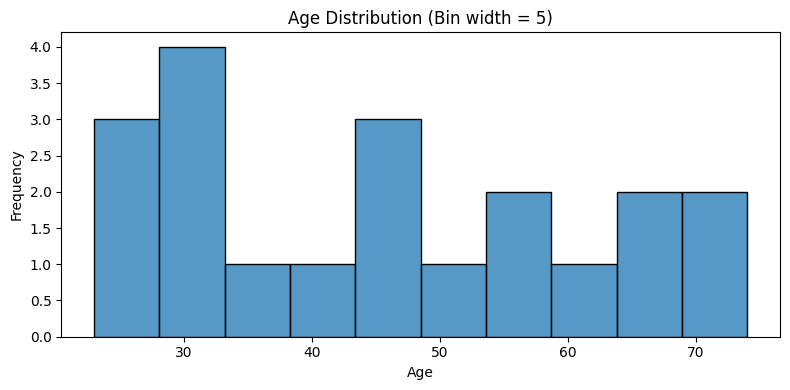

In [78]:
# Calculate number of bins
bin_width = 5
age_range = df['age'].max() - df['age'].min()
bins = int(age_range // bin_width)

plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=bins, kde=False)
plt.title("Age Distribution (Bin width = 5)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


#### b. Dependents - Fix data errors

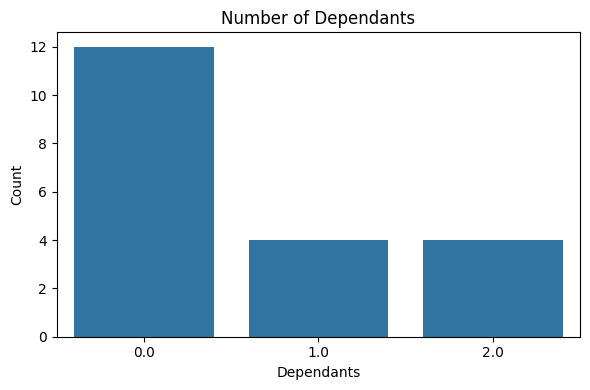

In [79]:
# Convert missing/blank dependents to 0
df['dependants'] = pd.to_numeric(df['dependants'], errors='coerce').fillna(0)

plt.figure(figsize=(6, 4))
sns.countplot(x='dependants', data=df)
plt.title("Number of Dependants")
plt.xlabel("Dependants")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


#### c. Age by Marital Status (default bins)

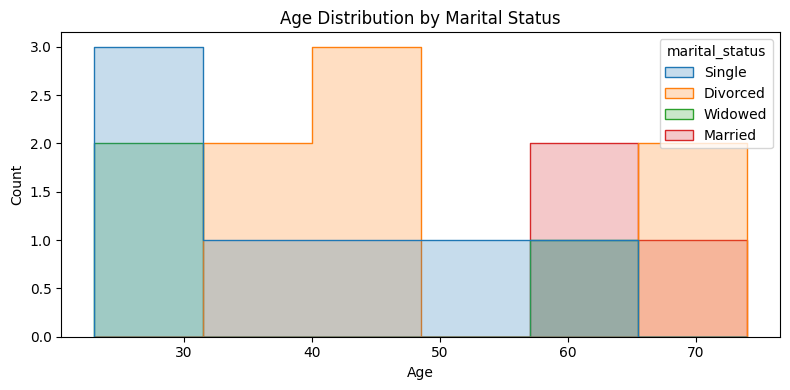

In [80]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x="age", hue="marital_status", element="step", stat="count", common_norm=False)
plt.title("Age Distribution by Marital Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## Step 3: Multivariate Plots

#### a. Commute Distance vs Salary

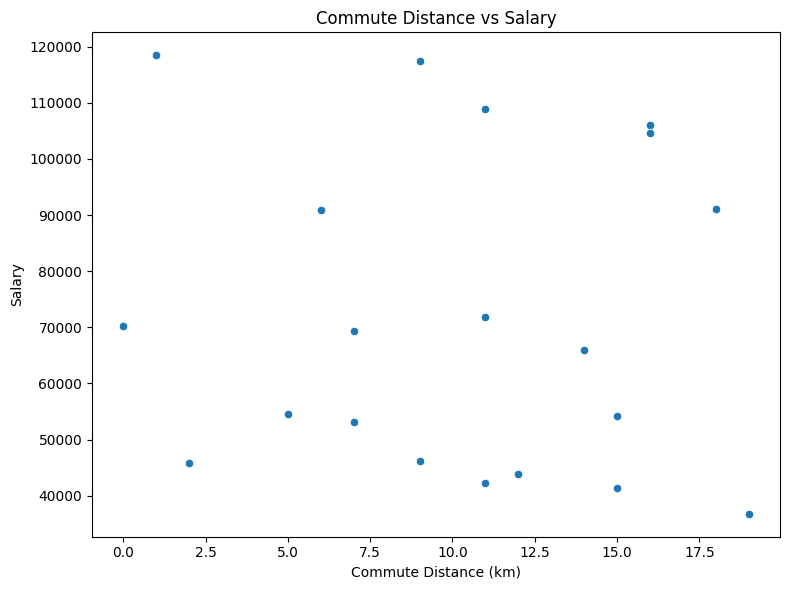

In [81]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='commute_distance', y='salary', data=df)
plt.title("Commute Distance vs Salary")
plt.xlabel("Commute Distance (km)")
plt.ylabel("Salary")
plt.tight_layout()
plt.show()


#### b. Age vs Salary

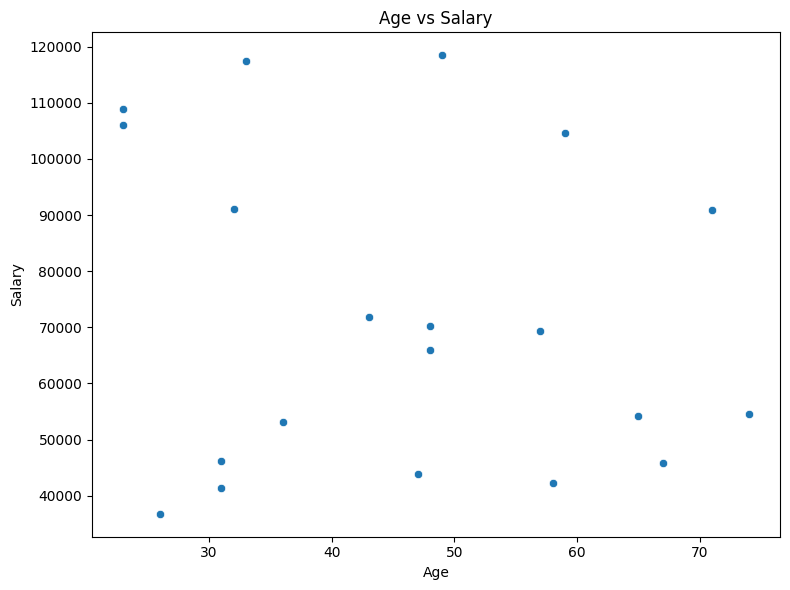

In [82]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='salary', data=df)
plt.title("Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.tight_layout()
plt.show()


#### c. Age vs Salary conditioned by Dependants

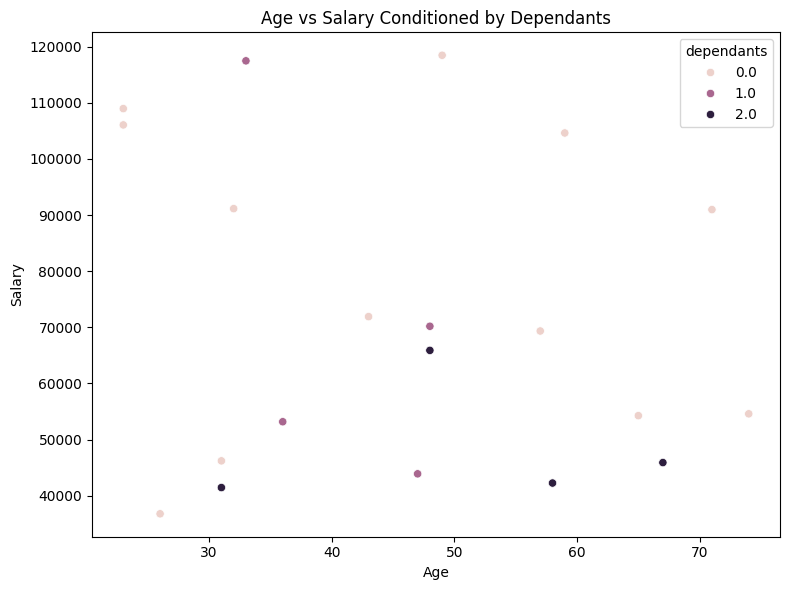

In [83]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='salary', hue='dependants', data=df)
plt.title("Age vs Salary Conditioned by Dependants")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.tight_layout()
plt.show()


## Step 4: Save All Plots

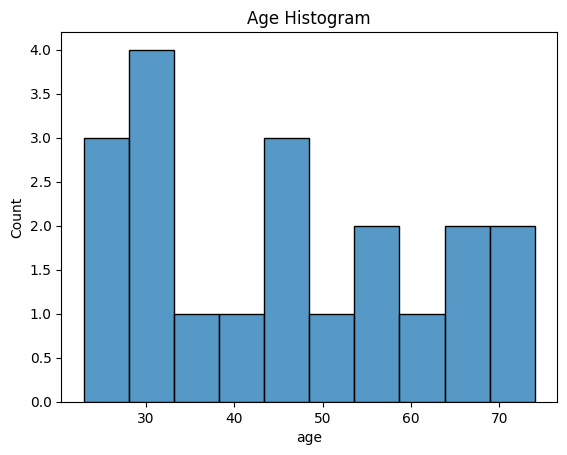

In [84]:
# Save all plots
def save_plot(fig, task2):
    fig.savefig(task2, dpi=300, bbox_inches='tight')

# Example usage (wrap each plot in a function or save inline)
fig1 = plt.figure()
sns.histplot(df['age'], bins=bins)
plt.title("Age Histogram")
save_plot(fig1, "age_histogram.png")
